In [5]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.stats as stats
import astropy.units as u
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
from bisect import bisect_left
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 22})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [15, 10]
from IPython.display import Audio, display
def allDone():
    display(Audio(filename='beep.mp3', autoplay=True))
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
import lmfit

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
import emcee
import corner
import numdifftools
from scipy.ndimage import interpolation
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from multiprocessing import Pool
import pickle

In [6]:
basePath = '../scratch/spec/*/*.fits'

In [7]:
wdtable = Table.read('ftable.fits')

In [8]:
import glob

files = glob.glob(basePath,recursive=True,)

In [9]:
len(files)

34316

In [10]:
import sys
sys.getsizeof(files)/1024

297.4375

In [12]:
wdtable['specpath'] = np.repeat('#'*70,len(wdtable))

In [13]:
sourcelist = list(wdtable['source_id'])

In [14]:
for i in tqdm(files):
    try:
        tableidx = sourcelist.index(int((i.split('/')[4]).split('_')[0]))
        wdtable['specpath'][tableidx] = i
        
    except:
        pass

100%|██████████| 34316/34316 [01:08<00:00, 497.66it/s] 


In [15]:
def get_spectrum(source_id):
    path = wdtable[wdtable['source_id'] == source_id][0]['specpath']
    try:
        f = fits.open(path)
        flux = f[1].data['flux']
        loglam = f[1].data['loglam']
        f.close()
        lam = 10**loglam
    except:
        print('Spectrum file missing...')
        return
    return lam,flux

In [25]:
pt = get_spectrum(wdtable['source_id'][235])

In [28]:
for i in tqdm(range(100)):
    get_spectrum(wdtable['source_id'][i])

 48%|████▊     | 48/100 [00:00<00:00, 72.60it/s]

Spectrum file missing...


100%|██████████| 100/100 [00:01<00:00, 72.24it/s]


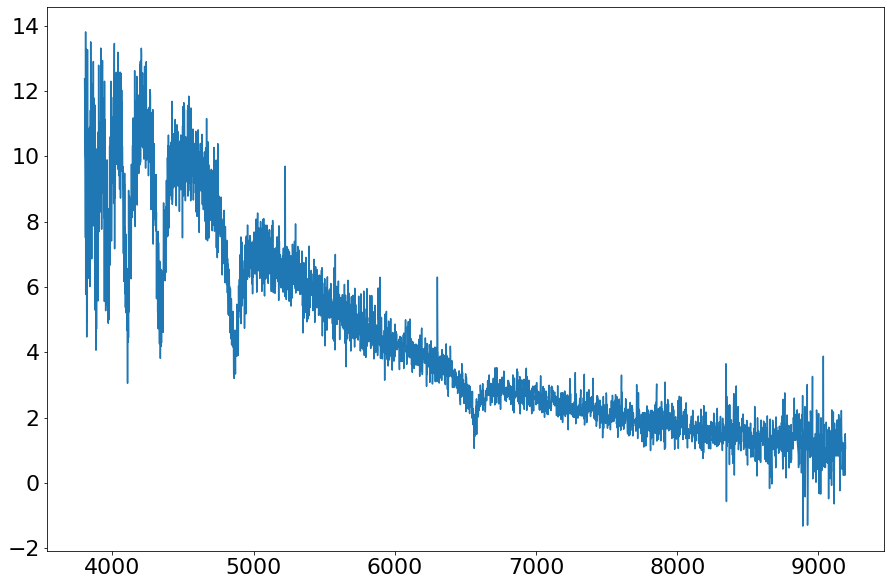

In [29]:
plt.plot(pt[1],pt[0])

In [33]:
filetable = wdtable[wdtable['specpath'] != '#'*70]

In [34]:
filetable.write('filetable.fits')